# Sentiment analysis with the perceptron algorithm

### Importing the necessary packages

In [1]:
!git clone https://github.com/s7s/machine_learning_1.git
%cd  machine_learning_1/perceptron_algorithm

Cloning into 'machine_learning_1'...
remote: Enumerating objects: 378, done.
remote: Counting objects: 100% (126/126), done.
remote: Compressing objects: 100% (125/125), done.
remote: Total 378 (delta 74), reused 3 (delta 1), pack-reused 252 (from 1)
Receiving objects: 100% (378/378), 42.71 MiB | 9.88 MiB/s, done.
Resolving deltas: 100% (197/197), done.
/content/machine_learning_1/perceptron_algorithm


In [2]:
# Importing packages
from matplotlib import pyplot as plt
import numpy as np
import random
import utils

### Defining and plotting our dataset

In [5]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

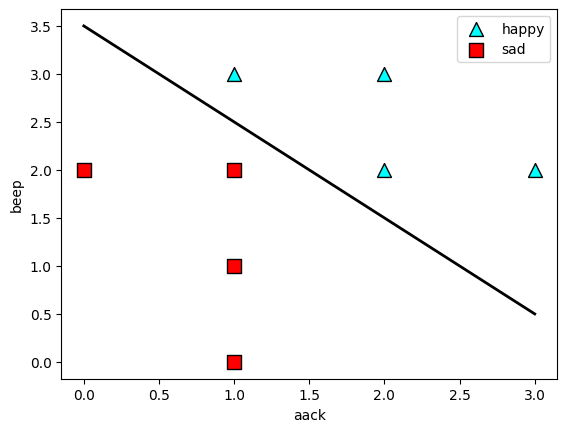

In [4]:
# Plotting the points
utils.plot_points(features, labels)

# Uncomment the following line to see a good line fit for this data.
utils.draw_line(1,1,-3.5)

### Coding the perceptron trick

In [22]:
def step(x):
    ## TODO ##
    # implement step function
    if x<0:
      output=0
    else:
      output=1
    return output


def score(weights, bias, features):
    ## TODO ##
    # implement score calculation
    output = weights@features + bias
    return output

def prediction(weights, bias, features):
    ## TODO ##
    # implement prediction calculation using step and score functions
    score_=score(weights, bias, features)
    output=step(score_)
    return output

def error(weights, bias, features, label):
    ## TODO ##
    # implement error calculation using prediction and score functions
    y_prediction = prediction(weights, bias, features)
    if y_prediction == label :
      output = 0
    else:
      output = np.abs(score(weights, bias, features))
    return output

def mean_perceptron_error(weights, bias, features, labels):
    total_error = 0
    for i in range(len(features)):
        total_error += error(weights, bias, features[i], labels[i])
    return total_error/len(features)

In [23]:
def perceptron_trick(weights, bias, features, label, learning_rate = 0.01):
    ## TODO ##
    # update the weights and bias using a single data sample

    y_prediction = prediction(weights, bias, features)

    for i in range( len(weights) ):
      weights[i] = weights[i] + learning_rate * ( label - y_prediction ) * features[i]

    bias = bias + ( label - y_prediction ) * learning_rate
    return weights, bias

### Running the perceptron algorithm

In [26]:
random.seed(0)
def perceptron_algorithm(features, labels, learning_rate = 0.01, epochs = 200):
    weights = [1.0 for i in range(len(features[0]))]
    bias = 0.0
    errors = []
    ## TODO ##
    # for this number of epochs
    # get a random datasample of our dataset(x,y)
    # using the selected datasample use perceptron_trick update weights and bias
    # append mean mean_perceptron_error in the errors list after each epoch
    for i in range(epochs) :
      indicies = np.random.choice(len(features))
      x=features[indicies]
      y=labels[indicies]
      weights, bias = perceptron_trick(weights, bias, features=x , label=y , learning_rate = learning_rate)
      errors.append(mean_perceptron_error(weights, bias, features , labels ))


    utils.draw_line(weights[0], weights[1], bias)
    utils.plot_points(features, labels)
    plt.ylim([-2, 5])
    plt.show()
    plt.scatter(range(epochs), errors)
    return weights, bias

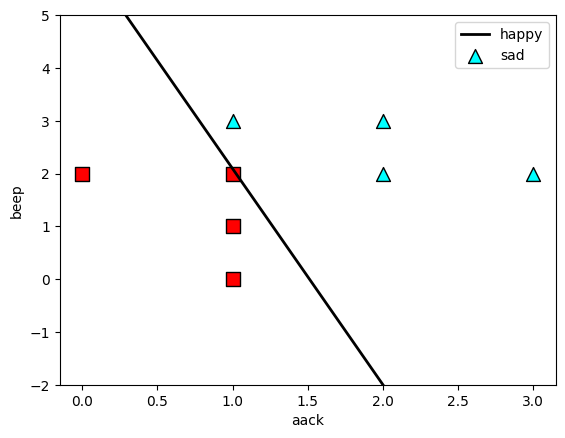

([0.4499999999999995, 0.10999999999999936], -0.6800000000000004)

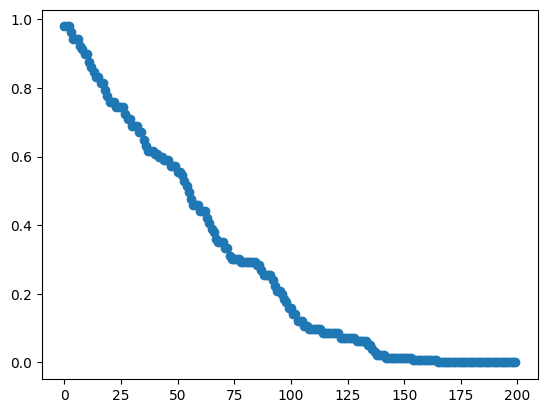

In [27]:
perceptron_algorithm(features, labels)

### The perceptron algorithm using SKlearn

In [29]:
from sklearn.linear_model import SGDClassifier
## TODO ##
# choose loss to be "perceptron" and tol = None
clf=SGDClassifier(loss="perceptron" , tol = None)
clf.fit(features, labels)

SGDClassifier(loss='perceptron', tol=None)

In [30]:
clf.score(features, labels)

1.0

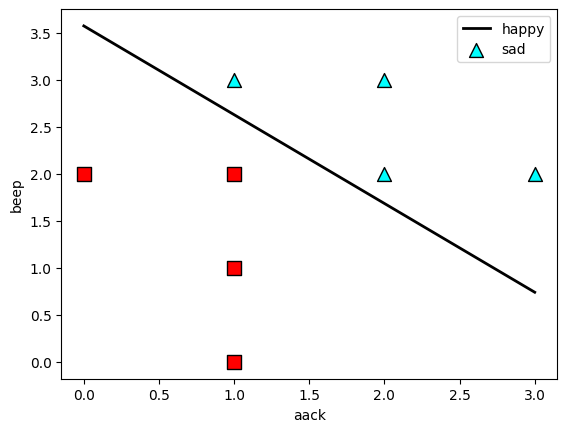

In [31]:
weights = clf.coef_
bias = clf.intercept_
utils.draw_line(weights[0][0], weights[0][1], bias)
utils.plot_points(features, labels)
plt.show()